Se utilizará un modelo de clasificación ya que como inputs tenemos datos con variables categóricas, y este modelo trabaja eficientemente con estas.

In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [423]:
df = pd.read_csv("inputs/dataTransform.csv",header=0, delimiter=';')

/var/folders/jy/x2pqrfp13zq3nj0tq7p5wp400000gn/T/ipykernel_2162/2404280550.py:1: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("inputs/dataTransform.csv",header=0, delimiter=';')


Partición del DF

In [424]:
X = df.drop("LoanApproved", axis=1).copy()
y = df.LoanApproved.copy()

In [425]:
X

,ApplicationDate,Gender,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,...,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
0,2018-01-01,1,45,39948,617,Employed,Master,22,13152,48,...,146111,19183,0.724972,11,126928,0.199652,0.227590,420.000,0.181077,49
1,2018-01-02,1,38,39709,628,Employed,Associate,15,26045,48,...,53204,9595,0.935132,3,43609,0.207045,0.201077,794.000,0.389852,52
2,2018-01-03,1,47,40724,570,Employed,Bachelor,26,17627,36,...,25176,128874,0.872241,6,5205,0.217627,0.212548,666.000,0.462157,52
3,2018-01-04,1,58,69084,545,Employed,High School,34,37898,96,...,104822,5370,0.896155,5,99452,0.300398,0.300911,1.048,0.313098,54
4,2018-01-05,1,37,103264,594,Employed,Associate,17,9184,36,...,244305,17286,0.941369,5,227019,0.197184,0.175990,3.302,0.070210,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,2019-03-20,1,44,30180,587,Employed,High School,19,24521,36,...,80969,25642,0.826217,1,55327,0.216021,0.195574,906.000,0.627741,55
19996,2019-03-21,1,56,49246,567,Employed,Associate,33,25818,36,...,69571,5569,0.816618,3,64002,0.227318,0.199168,958.000,0.334418,54
19997,2019-03-22,1,44,48958,645,Employed,Bachelor,20,37033,72,...,108316,4653,0.887216,3,103663,0.229533,0.226766,945.000,0.357227,45
19998,2019-03-23,1,60,41025,560,Employed,High School,36,14760,72,...,22085,11485,0.843787,5,10600,0.249760,0.264873,4.112,0.408678,59


In [426]:
y

0        0
1        0
2        0
3        0
4        1
        ..
19995    0
19996    0
19997    0
19998    0
19999    0
Name: LoanApproved, Length: 20000, dtype: int64

In [427]:
y.value_counts(normalize=True)*100

LoanApproved
0    76.1
1    23.9
Name: proportion, dtype: float64

In [428]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42, stratify=y)

In [429]:
X_train

,ApplicationDate,Gender,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,...,TotalAssets,TotalLiabilities,UtilityBillsPaymentHistory,JobTenure,NetWorth,BaseInterestRate,InterestRate,MonthlyLoanPayment,TotalDebtToIncomeRatio,RiskScore
8524,2021-04-07,0,19,50859,538,Employed,Bachelor,0,29668,72,...,4572,41213,0.971468,4,3310,0.275668,0.220534,746.000,0.282990,58
18758,2022-07-09,1,36,70618,605,Employed,High School,17,8858,96,...,52377,29475,0.872611,6,22902,0.241358,0.243689,210.000,0.069913,47
15520,2020-05-06,1,40,30117,616,Employed,High School,20,12622,48,...,77380,21863,0.849145,5,55517,0.199622,0.216549,395.000,0.314497,50
19306,2024-01-08,1,42,43785,556,Employed,Doctorate,22,18041,48,...,32204,18362,0.911877,4,13842,0.235041,0.233809,582.000,0.294625,60
18983,2023-02-19,1,31,31830,596,Employed,High School,12,13725,12,...,34194,17571,0.865123,5,16623,0.180725,0.177613,1.257,0.624599,56
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16525,2023-02-05,1,22,33577,503,Employed,High School,0,28209,84,...,31618,7704,0.709853,2,23914,0.301709,0.311936,829.000,0.425771,53
16422,2022-10-25,0,21,35506,506,Employed,High School,0,45792,12,...,84136,76525,0.843921,5,7611,0.257792,0.263725,438.000,NaN,55
2230,2024-02-09,1,31,81776,612,Employed,Doctorate,10,14455,108,...,113194,72736,0.869060,7,40458,0.253455,0.242914,3.306,0.094145,38
10125,2018-12-16,0,38,40653,560,Employed,Bachelor,15,17285,120,...,33086,33109,0.866658,5,4215,0.292285,0.337907,5.000,0.243156,58


In [430]:
y_train

8524     0
18758    0
15520    0
19306    0
18983    0
        ..
16525    0
16422    0
2230     1
10125    0
19666    0
Name: LoanApproved, Length: 14000, dtype: int64

In [431]:
from sklearn.preprocessing import OneHotEncoder

In [432]:
ohe = OneHotEncoder(sparse_output=False).fit(X_train[["Gender","EmploymentStatus", "EducationLevel", "BankruptcyHistory", "PreviousLoanDefaults"]])


In [433]:
encoded = ohe.transform(X_train[["Gender","EmploymentStatus", "EducationLevel", "BankruptcyHistory", "PreviousLoanDefaults"]])

In [434]:
encoded_df = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded, index=X_train.index)

In [435]:
encoded_df

,Gender_0,Gender_1,EmploymentStatus_Employed,EmploymentStatus_Self-Employed,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,BankruptcyHistory_0,BankruptcyHistory_1,PreviousLoanDefaults_0,PreviousLoanDefaults_1
8524,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
18758,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
15520,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
19306,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
18983,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16525,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
16422,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2230,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10125,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [436]:
X_train = pd.concat([X_train, encoded_df], axis='columns')

In [437]:
X_train

,ApplicationDate,Gender,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,...,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,BankruptcyHistory_0,BankruptcyHistory_1,PreviousLoanDefaults_0,PreviousLoanDefaults_1
8524,2021-04-07,0,19,50859,538,Employed,Bachelor,0,29668,72,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
18758,2022-07-09,1,36,70618,605,Employed,High School,17,8858,96,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
15520,2020-05-06,1,40,30117,616,Employed,High School,20,12622,48,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
19306,2024-01-08,1,42,43785,556,Employed,Doctorate,22,18041,48,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
18983,2023-02-19,1,31,31830,596,Employed,High School,12,13725,12,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16525,2023-02-05,1,22,33577,503,Employed,High School,0,28209,84,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
16422,2022-10-25,0,21,35506,506,Employed,High School,0,45792,12,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2230,2024-02-09,1,31,81776,612,Employed,Doctorate,10,14455,108,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
10125,2018-12-16,0,38,40653,560,Employed,Bachelor,15,17285,120,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


TEST

In [438]:
encoded_test = ohe.transform(X_test[["Gender","EmploymentStatus", "EducationLevel", "BankruptcyHistory", "PreviousLoanDefaults"]])
encoded_df_test = pd.DataFrame(columns=ohe.get_feature_names_out(), data=encoded_test, index=X_test.index)

In [439]:
X_test = pd.concat([X_test, encoded_df_test], axis='columns')

In [440]:
X_test

,ApplicationDate,Gender,Age,AnnualIncome,CreditScore,EmploymentStatus,EducationLevel,Experience,LoanAmount,LoanDuration,...,EmploymentStatus_Unemployed,EducationLevel_Associate,EducationLevel_Bachelor,EducationLevel_Doctorate,EducationLevel_High School,EducationLevel_Master,BankruptcyHistory_0,BankruptcyHistory_1,PreviousLoanDefaults_0,PreviousLoanDefaults_1
17702,2019-08-18,0,55,20211,592,Employed,Bachelor,33,46268,60,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
12509,2018-10-17,1,46,67455,628,Employed,High School,26,66712,36,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
13759,2022-03-20,0,38,21543,531,Employed,Master,16,11676,36,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
10107,2018-11-28,1,38,17357,576,Employed,High School,16,22538,48,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4831,2024-07-15,1,25,17983,598,Self-Employed,Bachelor,3,54160,48,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12094,2024-05-07,0,47,28101,534,Employed,Bachelor,24,34396,24,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
4060,2022-06-05,1,48,16353,621,Employed,Associate,20,12181,60,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
699,2019-12-01,0,37,51737,499,Employed,Associate,14,34832,60,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8383,2020-11-17,1,54,166784,574,Employed,High School,27,23342,84,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0


In [441]:
X_train = X_train.drop(["Gender","EmploymentStatus", "EducationLevel"], axis=1)
X_test = X_test.drop(["Gender","EmploymentStatus", "EducationLevel"], axis=1)




In [442]:
X_train = X_train.drop(["ApplicationDate","MaritalStatus","HomeOwnershipStatus","MonthlyDebtPayments","LoanPurpose"], axis=1)
X_test = X_test.drop(["ApplicationDate","MaritalStatus","HomeOwnershipStatus","MonthlyDebtPayments","LoanPurpose"], axis=1)

In [443]:
X_train = X_train.drop(["RiskScore"], axis=1)
X_test = X_test.drop(["RiskScore"], axis=1)

In [444]:
from xgboost import XGBClassifier

In [445]:
from sklearn.metrics import classification_report

In [446]:
xgb = XGBClassifier(n_estimators=200)

In [447]:
%%time
xgb.fit(X_train, y_train)

CPU times: user 746 ms, sys: 316 ms, total: 1.06 s
Wall time: 417 ms


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [448]:
train_pred = xgb.predict(X_train)
test_pred = xgb.predict(X_test)

In [449]:
print("Entrenamiento")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------------")
print("Testing")
print(classification_report(y_test, test_pred))


Entrenamiento
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     10654
           1       1.00      1.00      1.00      3346

    accuracy                           1.00     14000
   macro avg       1.00      1.00      1.00     14000
weighted avg       1.00      1.00      1.00     14000

----------------------------------------------------------
Testing
              precision    recall  f1-score   support

           0       0.96      0.97      0.97      4566
           1       0.91      0.88      0.90      1434

    accuracy                           0.95      6000
   macro avg       0.94      0.93      0.93      6000
weighted avg       0.95      0.95      0.95      6000



In [450]:
xgb.feature_importances_

array([0.01540867, 0.06650825, 0.02153957, 0.01562829, 0.02376305,
       0.0524196 , 0.00850389, 0.00658423, 0.00624958, 0.00638631,
       0.00705814, 0.00708558, 0.06059581, 0.05103815, 0.01199188,
       0.03160239, 0.00789856, 0.00607369, 0.02382885, 0.00697897,
       0.00668206, 0.00719591, 0.0512616 , 0.01019595, 0.06198003,
       0.007008  , 0.22454195, 0.00549156, 0.        , 0.00774266,
       0.01036887, 0.03609569, 0.02429082, 0.0039117 , 0.03079732,
       0.04538042, 0.02991201, 0.        , 0.        , 0.        ,
       0.        ], dtype=float32)

In [451]:
fi = pd.DataFrame(columns=["Feauture", "Importance"])
fi["Feauture"] = X_train.columns

In [452]:
fi["Importance"] = xgb.feature_importances_

In [453]:
fi = fi.sort_values("Importance", ascending=True)

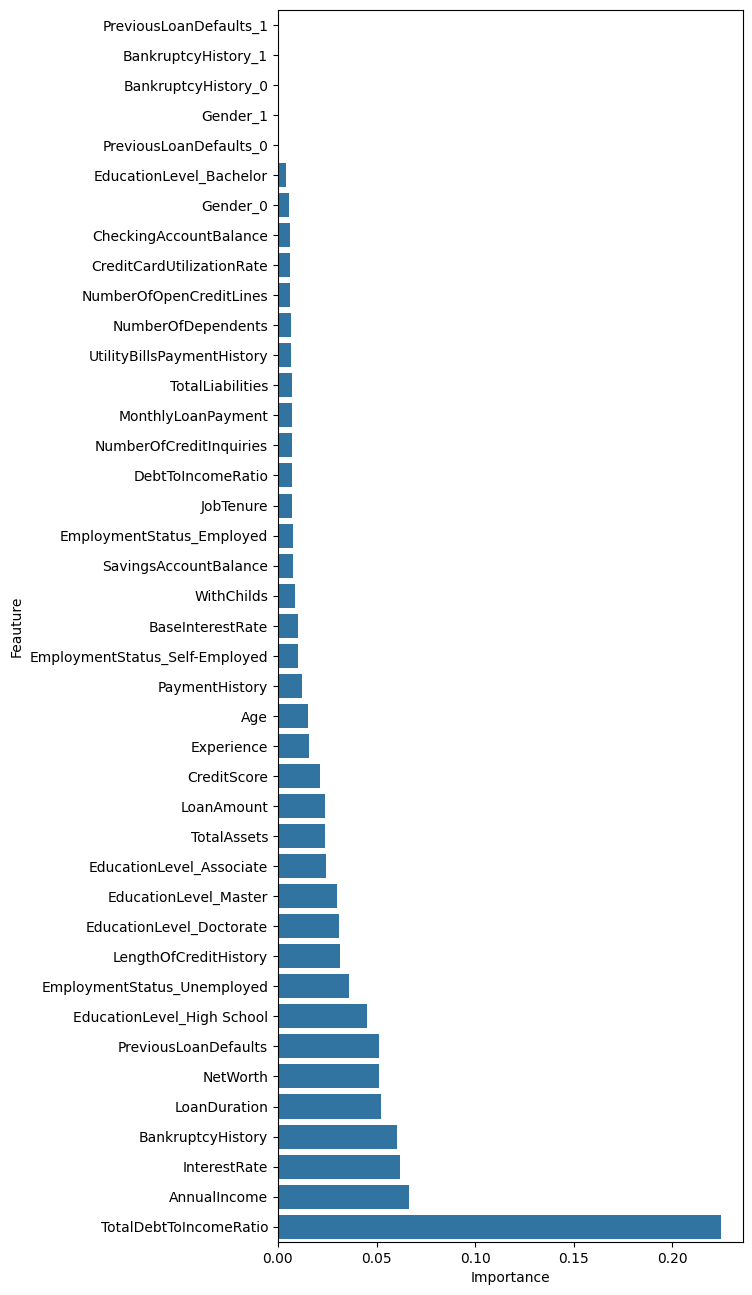

In [454]:
plt.figure(figsize=(6,16))
sns.barplot(y=fi.Feauture, x=fi.Importance)
plt.show()

TENIENDO EN CUENTA EL RESULTADO, VEO UN OVERFITTING EN TRAINING, SI BIEN LA DIFERENCIA ENTRE TRAINGING Y TEST ES MENOR A 0,05 Y EL ACCURACY ES 95%, TENIENDO EN CUENTA EL GRAFICO, SE ENTRENARÁ EL MODELO CON LAS SIGUIENTES VARIABLES:
TotalDebtToIncomeRario
AnnualIncome
BankruptcyHistory
LoanDuration
PreviousLoanDefault

In [456]:
##X_train = X_train.drop(["Gender","EmploymentStatus", "EducationLevel"], axis=1)
##X_test = X_test.drop(["Gender","EmploymentStatus", "EducationLevel"], axis=1)
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6000 entries, 17702 to 3530
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             6000 non-null   int64  
 1   AnnualIncome                    6000 non-null   int64  
 2   CreditScore                     6000 non-null   int64  
 3   Experience                      6000 non-null   int64  
 4   LoanAmount                      6000 non-null   int64  
 5   LoanDuration                    6000 non-null   int64  
 6   WithChilds                      6000 non-null   int64  
 7   NumberOfDependents              6000 non-null   int64  
 8   CreditCardUtilizationRate       6000 non-null   float64
 9   NumberOfOpenCreditLines         6000 non-null   int64  
 10  NumberOfCreditInquiries         6000 non-null   int64  
 11  DebtToIncomeRatio               6000 non-null   float64
 12  BankruptcyHistory               600

In [457]:
X_test_2 = X_test[["TotalDebtToIncomeRatio","AnnualIncome","BankruptcyHistory","LoanDuration","PreviousLoanDefaults"]]
X_train_2 = X_train[["TotalDebtToIncomeRatio","AnnualIncome","BankruptcyHistory","LoanDuration","PreviousLoanDefaults"]]

In [458]:
X_test_2

,TotalDebtToIncomeRatio,AnnualIncome,BankruptcyHistory,LoanDuration,PreviousLoanDefaults
17702,0.976159,20211,0,60,0
12509,0.500260,67455,0,36,0
13759,0.541960,21543,0,36,0
10107,NaN,17357,0,48,1
4831,NaN,17983,0,48,0
...,...,...,...,...,...
12094,NaN,28101,0,24,0
4060,0.496662,16353,0,60,0
699,0.423376,51737,0,60,0
8383,0.118565,166784,0,84,1


In [459]:
X_train_2.columns

Index(['TotalDebtToIncomeRatio', 'AnnualIncome', 'BankruptcyHistory',
       'LoanDuration', 'PreviousLoanDefaults'],
      dtype='object')

In [460]:
from xgboost import XGBClassifier
xgb = XGBClassifier(n_estimators=200)

In [461]:
xgb.fit(X_train_2, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [462]:
train_pred_2 = xgb.predict(X_train_2)
test_pred_2 = xgb.predict(X_test_2)

In [463]:
print("Entrenamiento")
print(classification_report(y_train, train_pred_2))
print("----------------------------------------------------------")
print("Testing")
print(classification_report(y_test, test_pred_2))

Entrenamiento
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     10654
           1       0.91      0.85      0.88      3346

    accuracy                           0.94     14000
   macro avg       0.93      0.91      0.92     14000
weighted avg       0.94      0.94      0.94     14000

----------------------------------------------------------
Testing
              precision    recall  f1-score   support

           0       0.91      0.93      0.92      4566
           1       0.77      0.72      0.74      1434

    accuracy                           0.88      6000
   macro avg       0.84      0.83      0.83      6000
weighted avg       0.88      0.88      0.88      6000



Sin la necesidad de cambiar hiperparámetros, se mejora la performance del modelo aunque se sigue observando overfiting

In [464]:
from sklearn.model_selection import GridSearchCV

In [465]:
param_grid = {
    'n_estimators':[200,300,400],
    'max_depth':[3,5,7],
    'learning_rate':[0.01, 0.05, 0.005],
    'subsample':[1],
    'colsample_bytree': [0.4, 0.5, 0.6],
    'min_child_weight':[1,3,5]
}

In [466]:
xgboost = XGBClassifier(eval_metrics='logloss')

In [467]:
grid_search = GridSearchCV(estimator=xgboost, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

In [468]:
grid_search.fit(X_train_2,y_train)

/Users/matias/Library/Python/3.13/lib/python/site-packages/xgboost/core.py:158: UserWarning: [00:01:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/matias/Library/Python/3.13/lib/python/site-packages/xgboost/core.py:158: UserWarning: [00:01:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/matias/Library/Python/3.13/lib/python/site-packages/xgboost/core.py:158: UserWarning: [00:01:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/matias/Library/Python/3.13/lib/python/site-packages/xgboost/core.py:158: UserWarning: [00:01:40] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "eval_metrics" } are not used.

  warnings.warn(smsg, UserWarning)


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     eval_metrics='logloss', feature_types=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=N...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.4, 0.5, 0.6],
                         'learning_rate': [0.01, 0.05, 0.005],
                         'max_depth': [3, 5, 7], 'min_child_weight': [1, 3, 5],
                         'n_estimators': [200, 300, 400], 'subsample': [1]},
             scoring='accuracy')

In [469]:
best_model = grid_search.best_estimator_

In [470]:
train_pred = best_model.predict(X_train_2)
test_pred = best_model.predict(X_test_2)

In [471]:
print("Entrenamiento")
print(classification_report(y_train, train_pred))
print("----------------------------------------------------------")
print("Testing")
print(classification_report(y_test, test_pred))

Entrenamiento
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     10654
           1       0.81      0.74      0.77      3346

    accuracy                           0.90     14000
   macro avg       0.86      0.84      0.85     14000
weighted avg       0.89      0.90      0.89     14000

----------------------------------------------------------
Testing
              precision    recall  f1-score   support

           0       0.92      0.94      0.93      4566
           1       0.79      0.74      0.76      1434

    accuracy                           0.89      6000
   macro avg       0.85      0.84      0.85      6000
weighted avg       0.89      0.89      0.89      6000



In [472]:
##guardo el modelo
import joblib
joblib.dump(best_model, "inputs/models/xgboos_bestmodel.joblib")

['inputs/models/xgboos_bestmodel.joblib']

In [474]:
probabilidades_train = best_model.predict_proba(X_train_2)[:,1]
probabilidades_test = best_model.predict_proba(X_train_2)[:,1]

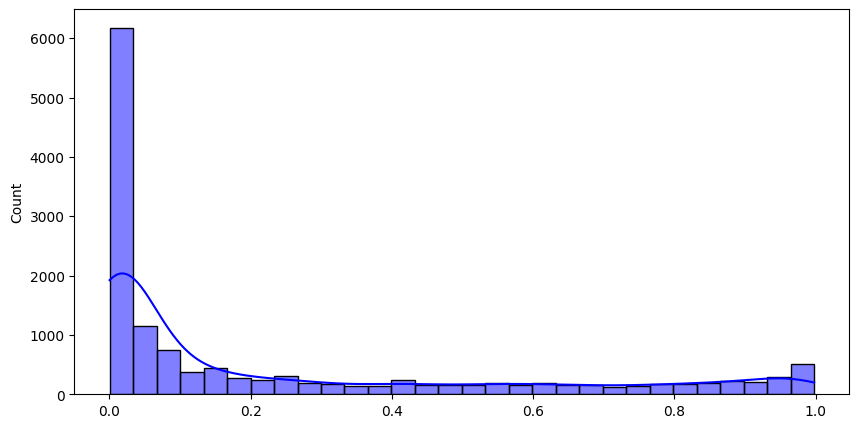

In [476]:

plt.figure(figsize=(10,5))
sns.histplot(probabilidades_train, bins=30, kde=True, color='blue')
plt.show()